### Dummy Code for executing pan shops and pan shop sales
##### Activities
        EDA Analysis
        Some tricky questions solving


In [23]:
import csv
import random
from faker import Faker
from datetime import datetime, timedelta

fake = Faker('en_IN')

# ----- Constants -----
NUM_SHOPS = 300  # Number of pan shops
SALES_ENTRIES = 5000  # Total number of sales entries

STATES = ['Maharashtra', 'Uttar Pradesh', 'Tamil Nadu', 'Karnataka', 'Delhi', 'West Bengal']
CITIES = {
    'Maharashtra': ['Mumbai', 'Pune'],
    'Uttar Pradesh': ['Lucknow', 'Kanpur'],
    'Tamil Nadu': ['Chennai', 'Coimbatore'],
    'Karnataka': ['Bengaluru', 'Mysore'],
    'Delhi': ['New Delhi'],
    'West Bengal': ['Kolkata', 'Howrah']
}

PRODUCTS = [
    ("Cigarettes", ["International", "Domestic"]),
    ("Drinks", ["International", "Domestic"]),
    ("Chocolates", ["International", "Domestic"]),
    ("Biscuits", ["International", "Domestic"]),
    ("Chips", ["International", "Domestic"]),
    ("Lighters", ["Local"]),
    ("Chewing Gum", ["International", "Domestic"]),
    ("Peanuts", ["Local"]),
    ("Soda", ["International", "Domestic"]),
    ("Match Boxes", ["Local"]),
    ("Sweets", ["Local"]),
    ("Jelly", ["Local"]),
    ("Mysorepak", ["Local"]),
    ("Soanpapdi", ["Local"])
]

def generate_timings():
    opening = random.randint(7, 11)
    closing = random.randint(20, 23)
    return f"{opening}:00 - {closing}:00"

# ----- Generate pan_shops.csv -----
shop_names = []
pan_shops_path = 'D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shops.csv'
with open(pan_shops_path, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Name', 'Size', 'Timings', 'Owner', 'Rent', 'Location', 'City', 'State'])

    for _ in range(NUM_SHOPS):
        state = random.choice(STATES)
        city = random.choice(CITIES[state])
        name = f"{fake.first_name()}'s Pan Shop"
        size = random.randint(50, 150)
        timings = generate_timings()
        owner = fake.name()
        rent = random.randint(2500, 12000)
        location = fake.street_address()
        writer.writerow([name, size, timings, owner, rent, location, city, state])
        shop_names.append(name)

# ----- Generate pan_shop_sales.csv -----
pan_shop_sales_path = 'D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shop_sales.csv'
with open(pan_shop_sales_path, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow([
        'Name', 'Date', 'Time', 'Item', 'Item_Description',
        'Packed', 'Quantity', 'Sold', 'UnitPrice', 'Profit'
    ])

    for _ in range(SALES_ENTRIES):
        shop_name = random.choice(shop_names)
        sale_date = fake.date_between(start_date='-30d', end_date='today').strftime('%Y-%m-%d')
        sale_time = fake.time(pattern='%H:%M:%S')
        item, descriptions = random.choice(PRODUCTS)
        description = random.choice(descriptions)
        packed = 'Yes' if item not in ['Sweets', 'Jelly', 'Mysorepak', 'Soanpapdi', 'Peanuts', 'Match Boxes'] else 'No'
        quantity = random.randint(5, 100)
        sold = random.randint(1, quantity)
        unit_price = round(random.uniform(2.0, 60.0), 2)
        profit = round(sold * unit_price * random.uniform(0.1, 0.4), 2)

        writer.writerow([
            shop_name, sale_date, sale_time, item, description,
            packed, quantity, sold, unit_price, profit
        ])


#### EDA Steps
    Data Ingestion
    Data Cleanup
    Data Statistics
    Data Visualization

##### Data Ingestion - Start

In [88]:
import pandas as pd
# Data Ingestion
pan_shops_path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shops.csv"
pan_shop_sales_path = r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\pan_shops_in_india\pan_shop_sales.csv"
pan_shops_df = pd.read_csv(pan_shops_path, na_values=["", "NA"], keep_default_na=False)
pan_shop_sales_df = pd.read_csv(pan_shop_sales_path, na_values=["", "NA"], keep_default_na=False)
pan_shops_df.name = "pan_shops"; pan_shop_sales_df.name="pan_shop_sales"
shops_df = pan_shops_df; sales_df = pan_shop_sales_df

#####  Data Ingestion - End

#####      Data Cleanup (If Required) - Start
    Check duplicates and remove them
    Check nulls and replace them

###### Check Duplicates

In [33]:
pan_shops_df.duplicated().sum(), pan_shop_sales_df.duplicated().sum()

(np.int64(0), np.int64(0))

In [36]:
#### No Duplicates found
# If found code to remove duplicates
# pan_shops_df.drop_duplicates(keep="first").reset_index(drop=True)

###### Check nulls & replace them

In [38]:
pan_shops_df.isna().sum().sum(), pan_shop_sales_df.isna().sum().sum()

(np.int64(0), np.int64(0))

In [39]:
#### No Null values found

#####         Data Cleanup (If Required) - End

#####         Data Statistics - Start

In [55]:
pan_shops_categorical_col = pan_shops_df.columns[pan_shops_df.dtypes=="object"]
pan_shops_continuous_col = pan_shops_df.columns[pan_shops_df.dtypes!="object"]
pan_shops_categorical_col, pan_shops_continuous_col
pan_shop_sales_categorical_col = pan_shop_sales_df.columns[pan_shop_sales_df.dtypes == "object"]
pan_shop_sales_continuous_col = pan_shop_sales_df.columns[pan_shop_sales_df.dtypes!="object"]
pan_shop_sales_categorical_col, pan_shop_sales_continuous_col
shop_cat = pan_shops_categorical_col
shop_con = pan_shops_continuous_col
sales_cat = pan_shop_sales_categorical_col
sales_con = pan_shop_sales_continuous_col

#####         Data Statistics - End

##### Data Visualization - Start
    1.Univariate - Single column visulization
    2.Bivariate - two column
    3.Multivariate - multiple columns

##### Univariate - Single column visulization

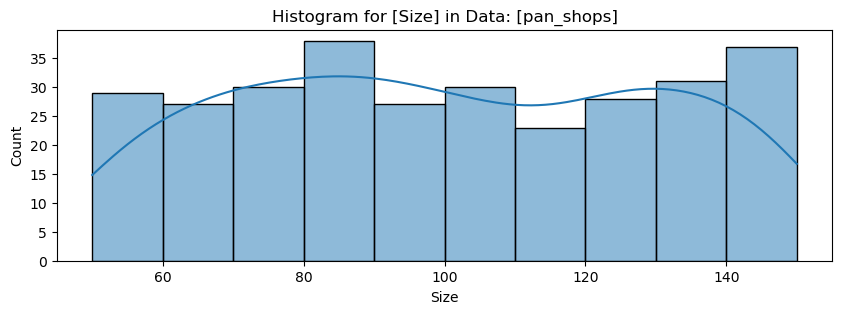

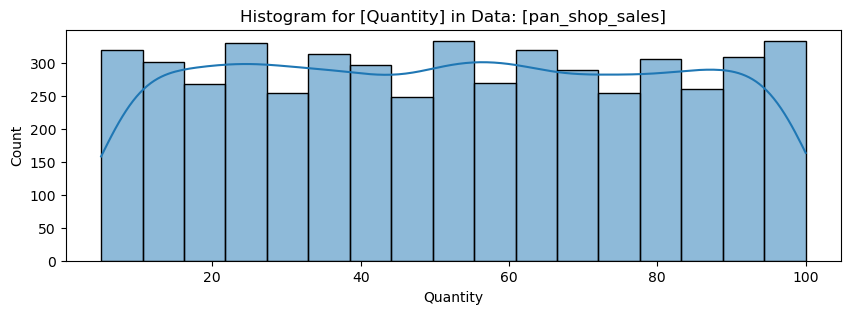

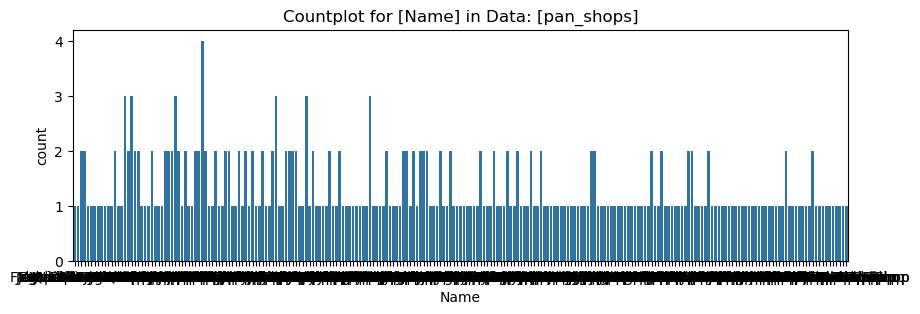

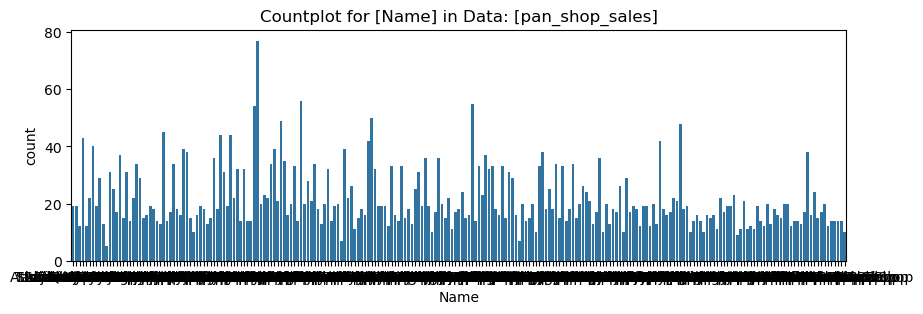

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for [{col}] in Data: [{df.name}]')
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for [{col}] in Data: [{df.name}]')
    plt.show()

for col in shop_con:
    plot_histogram(shops_df, col)
    break

for col in sales_con:
    plot_histogram(sales_df, col)
    break # Just breaking for one column

for col in shop_cat:
    plot_count(shops_df, col)
    break # Just breaking for one column

for col in sales_cat:
    plot_count(sales_df, col)
    break

##### Bivariate - two columns
    Analyze two variables at a time
    1.continuous vs continuous -> scatterplot, regplot
    2.categorical vs continuous -> boxplot
    3.categorical vs categorical -> crosstab heatmap

In [71]:
# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y} for Data:{df.name}")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y} for Data: {df.name}")
    plt.show()



In [69]:
shop_con,shop_cat

(Index(['Size', 'Rent'], dtype='object'),
 Index(['Name', 'Timings', 'Owner', 'Location', 'City', 'State'], dtype='object'))

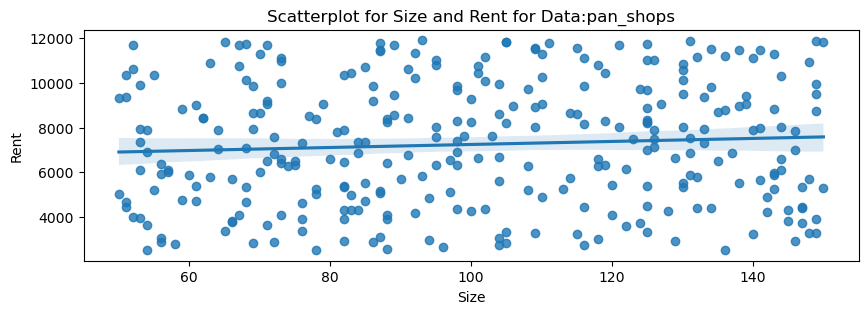

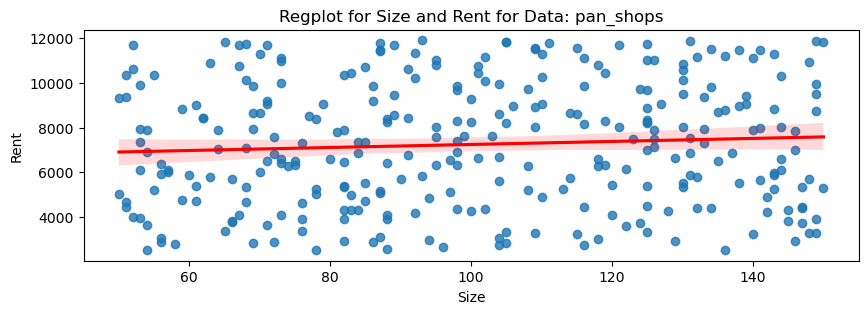

In [73]:
plot_scatter(shops_df, 'Size', 'Rent')
plot_reg(shops_df, 'Size', 'Rent')

In [74]:
sales_con, sales_cat

(Index(['Quantity', 'Sold', 'UnitPrice', 'Profit'], dtype='object'),
 Index(['Name', 'Date', 'Time', 'Item', 'Item_Description', 'Packed'], dtype='object'))

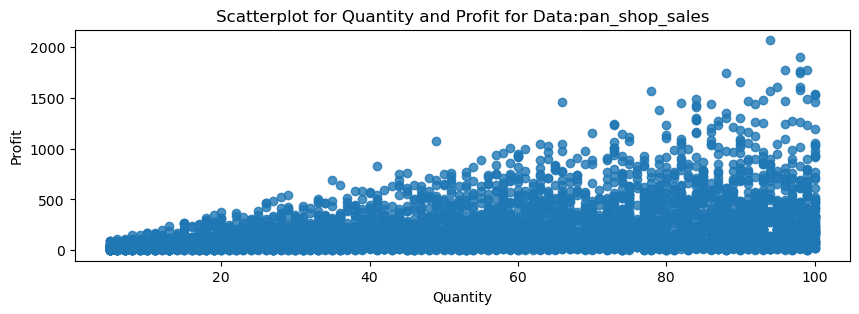

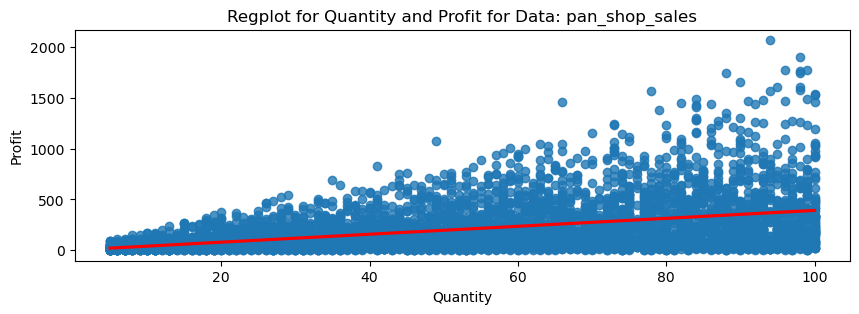

In [75]:
plot_scatter(sales_df, 'Quantity', 'Profit')
plot_reg(sales_df, 'Quantity', 'Profit')

##### categorical vs continuous -> boxplot

In [94]:
def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y} ")
    plt.xticks(rotation=90)
    plt.show()


In [80]:
shop_con,shop_cat

(Index(['Size', 'Rent'], dtype='object'),
 Index(['Name', 'Timings', 'Owner', 'Location', 'City', 'State'], dtype='object'))

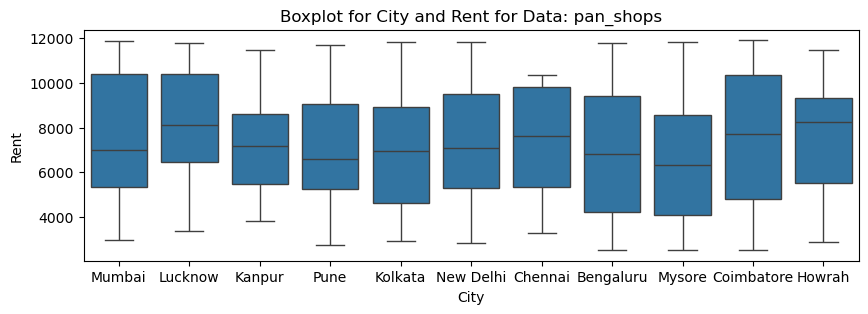

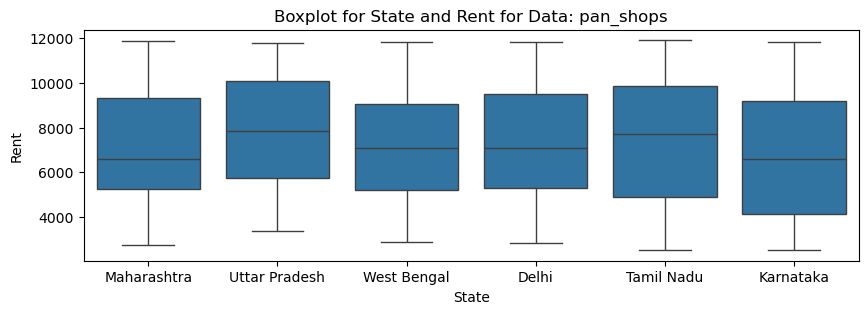

In [79]:
plot_box(shops_df, 'City', 'Rent')
plot_box(shops_df, 'State', 'Rent')

In [81]:
sales_con, sales_cat

(Index(['Quantity', 'Sold', 'UnitPrice', 'Profit'], dtype='object'),
 Index(['Name', 'Date', 'Time', 'Item', 'Item_Description', 'Packed'], dtype='object'))

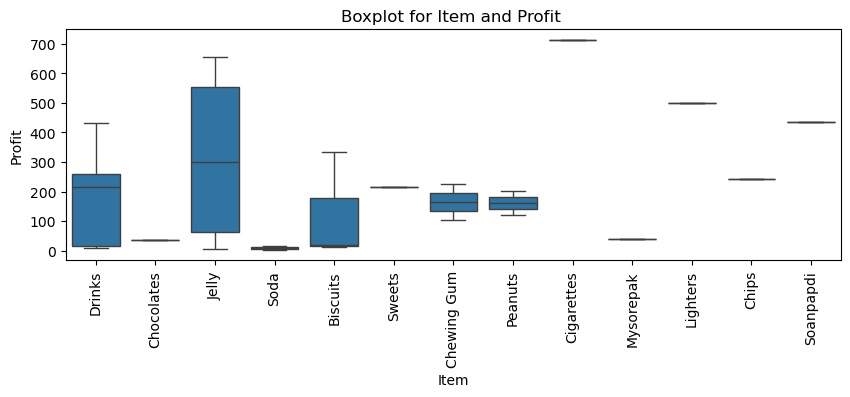

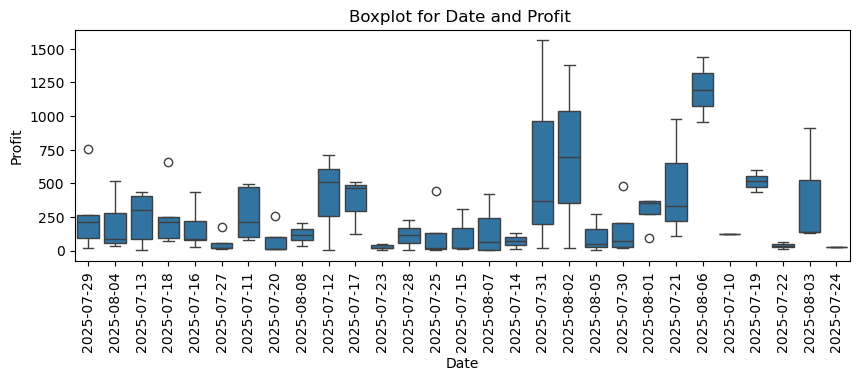

In [96]:
plot_box(sales_df.head(25), 'Item', 'Profit')
plot_box(sales_df.head(100), 'Date', 'Profit')

##### Data Visualization - End

##### Querying Examples on Dataframes - Start

##### Querying Examples on Dataframes - End